In [69]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc

from lightgbm import LGBMClassifier as lgb
from xgboost import XGBClassifier as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, f1_score, log_loss, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score

from sklearn.model_selection import GridSearchCV

%matplotlib inline 

In [70]:
def load_data(path):
    data =  pd.read_csv(path)
    return data

In [71]:
data = load_data("Heart Attack Data Set.csv")

In [72]:
def data_preprocessing(data):
    data.drop_duplicates(inplace = True)  #drop duplicates
    data = pd.get_dummies(data, columns = ['cp', 'slope', 'thal', 'ca'], drop_first = True) #onehot encoding of categorical features
    
    X = data.drop('target',axis = 1)
    y = data.target
    
    scale = SS().fit(X)
    X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42,stratify = y)
    X_train = scale.transform(X_train)
    X_test = scale.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [73]:
X_train, X_test, y_train, y_test = data_preprocessing(data)

In [74]:
mod  = { 'LogR' : LR(), 'RF' : rfc(), 'DT' : dtc(), 'LGB' : lgb(), 'XGB' : xgb() }
mod['RF']

RandomForestClassifier()

In [75]:
def model_train(X_train, y_train, model):
    model.fit(X_train,y_train)
    return model
    
    '''
    LogR = LR().fit(X_train,y_train)
    RF = rfc().fit(X_train,y_train)
    DT = dtc().fit(X_train,y_train)
    LGB = lgb().fit(X_train,y_train)
    XGB = xgb().fit(X_train,y_train)
    '''

In [76]:
def prediction(fitted_mod, X_test):
    yhat = fitted_mod.predict(X_test)
    return yhat

In [77]:
def get_accuracy(y_test, yhat):
    return {
    'F1_score' : f1_score(y_test, yhat),
    'Recall' : recall_score(y_test, yhat),
    'Precision' : precision_score(y_test, yhat)}
    #'Classification_Report \n' : classification_report(y_test, yhat) }
    

In [78]:
def get_confusion_matrix(y_test, yhat):
    ax = sns.heatmap(confusion_matrix(y_test, yhat), annot= True, xticklabels=['False', 'True'], yticklabels=['False', 'True'])
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    
    CF =  plt.savefig('confusion_matrix.png')
    return CF

In [79]:
def create_experiment(experiment_name, run_name, metrics, model, confusion_matrix_path, tag):
    import mlflow
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name):
        
        for metric in metrics:
            mlflow.log_metric(metric, metrics[metric])
            
        mlflow.sklearn.log_model(model,'model')
        
        mlflow.log_artifact(confusion_matrix_path,'confusion_matrix')
        
        mlflow.set_tag('tag', tag)
        
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))
        

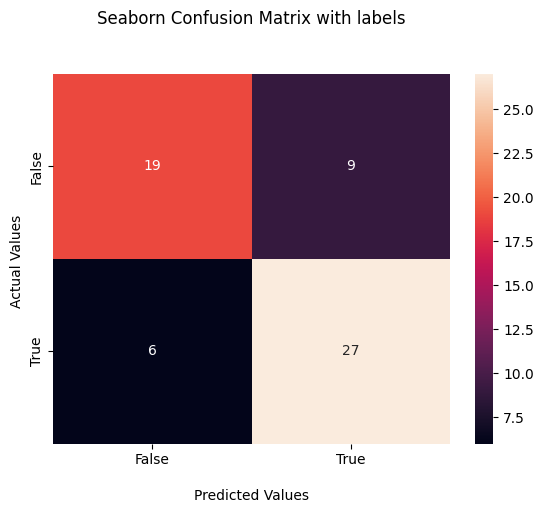

In [80]:
#run model
model = model_train(X_train, y_train, mod['RF'])
yhat = prediction(model, X_test)
metrics = get_accuracy(y_test,yhat)
get_confusion_matrix(y_test,yhat)


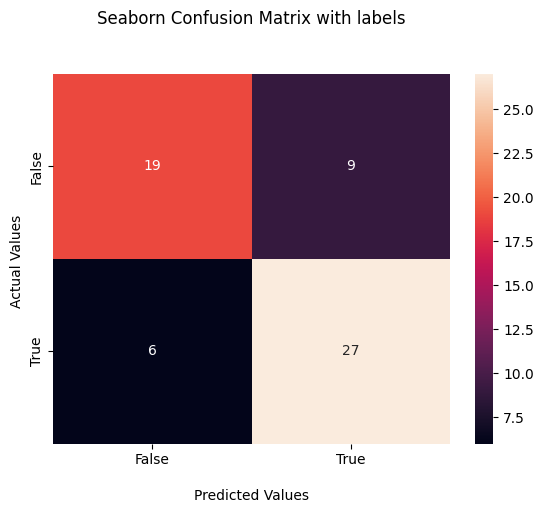

In [81]:
experiment_name = 'Random_Forest3'
run_name = 'Untuned_RF'
get_confusion_matrix(y_test,yhat)
confusion_matrix_path = 'confusion_matrix.png'
tag = 'RF_exp1'

In [82]:
create_experiment(experiment_name,run_name,metrics,model,confusion_matrix_path,tag)

2023/07/23 17:03:33 INFO mlflow.tracking.fluent: Experiment with name 'Random_Forest3' does not exist. Creating a new experiment.


Run - Untuned_RF is logged to Experiment - Random_Forest3


c:\Users\kunda\anaconda3\envs\mlflow\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\kunda\anaconda3\envs\mlflow\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
